## Linear Regression

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('student_scores.csv')

In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting

In [6]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

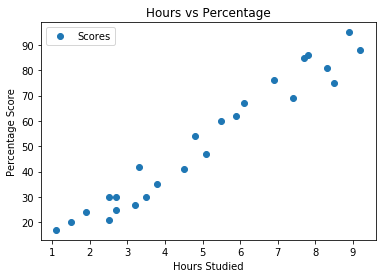

In [7]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

C:\Users\Kanav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Kanav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


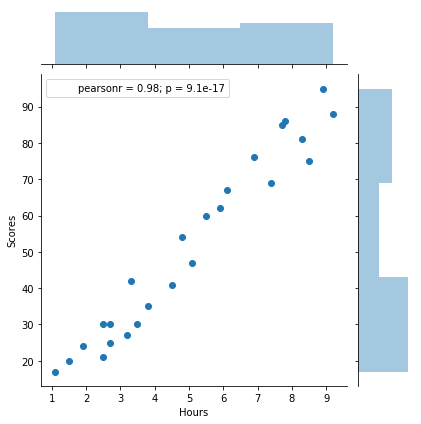

In [8]:
sns.jointplot('Hours', 'Scores', data=dataset)

### Preparing the Data - Test Train

In [9]:
x = dataset[['Hours']]
y = dataset['Scores']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, \
                                                    random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


### Training

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('y intercept: ',regressor.intercept_)

y intercept:  2.018160041434683


In [13]:
print('slope: ',regressor.coef_)

slope:  [9.91065648]


### Making the Prediction

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### Evaluating the Algorithm

In [16]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Squared Error:  4.6474476121003665


In [17]:
print(metrics.r2_score(y_test, y_pred))

0.9454906892105356


## Multiple Linear Regression

### Load the Data

In [18]:
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [19]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


### Preparing the Data - Test Train

In [20]:
dataset.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [21]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

y = dataset['Petrol_Consumption']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=0)

### Training

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Making the Predictions

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


### Evaluating the Algorithm

In [26]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  56.822247478964684
Mean Squared Error:  4666.3447875883585
Root Mean Squared Error:  68.31064915215165


In [27]:
print(metrics.r2_score(y_test, y_pred))

0.2036193241012182
